# alignmentOfIlluminaReads.ipynb
## Marcus Viscardi,    April 18, 2023

Going to use mappy to align my reads from the illumina library!

In [1]:
import mappy as mp
import pandas as pd
import numpy as np
import nanoporePipelineCommon as npc
from tqdm.notebook import tqdm

print(f"imports done at {npc.get_dt(for_print=True)}")

imports done at 05/03/23 @ 03:11:26 PM


In [2]:
fastq = npc.FastqFile("/data16/marcus/working/230418_RNAStds_butWithIllumina/rMV01_S1_L006_R1_001.fastq")


Starting fastq iterative load @ 05/03/23 @ 03:11:27 PM


Processing K00364:280:HTN7HBBXY:6:1102:9059:3477:   1%|          | 2816/314226 [00:01<02:03, 2526.19it/s]  IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Processing K00364:280:HTN7HBBXY:6:1104:10155:35620:   3%|▎         | 10381/314226 [00:04<01:57, 2576.84it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Processing K00364:280:HTN7HBBXY:6:1107:16092:20691:   6%|▌         | 18236/314226 [00:07<02:18, 2136.51it/s]IOPub message rate exceeded

In [3]:
fastq_df =fastq.df.copy()

In [4]:
barcode_dict = {
    '00': 'GGTGTTGTT',
    '05': 'CGGCAATAA',
    '10': 'TAATCGTCC',
    '15': 'CCTTCTAGG',
    '30': 'ACACACACC',
    '60': 'AAGAGGAGG',
}

rc_barcode_dict = {key: mp.revcomp(value) for key, value in barcode_dict.items()}

reverse_barcode_dict = {value: key for key, value in barcode_dict.items()}

In [7]:
def barcode_lookup(barcode):
    try:
        return reverse_barcode_dict[barcode]
    except KeyError:
        return "fail"

In [8]:
fastq_df[["UMI", "barcode"]] = fastq_df.sequence.str.extract(r"CGTAAGCAAGAGAAGAG(.{8})TCAGCTCAGC(.*)")
fastq_df['matched_barcode'] = fastq_df.barcode.apply(barcode_lookup)

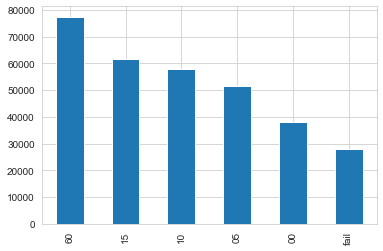

In [9]:
import seaborn as sea
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
sea.set_style("whitegrid")
fig = fastq_df.matched_barcode.value_counts().plot.bar()
plt.savefig(f"./{npc.get_dt()}_barcode_counts.png")

In [10]:
newerN2 = npc.NanoporeRun(run_nickname="newerN2")
newerN2.load_mergedOnReads()

Loading 230327_mergedOnReads.plusStandards.parquet... Done. Loaded 1,053,185 rows.


,read_id,bit_flag,chr_id,chr_pos,mapq,cigar,r_next,p_next,len,sequence,phred_qual,AS,NM,SA,cm,de,ms,nn,rl,s1,s2,t3,t5,tp,ts,zd,strand,qc_tag_featc,qc_pass_featc,gene_id,gene_name,chr,leader_start,adapter_start,polya_start,transcript_start,read_rate,polya_length,qc_tag_polya,read_length,assignment
0,967a90ce-5e1b-470e-aeca-6234ff58c418,16,I,3747,60,187S13M1D116M1D5M1I15M,*,0,0,ATTTAACATAATTATTAGCACATTATTAAAAATAATGTACTGATGT...,"$064865:<15433753*/0/-%)62;=/?8191+++*.5(%$""'*...",134,5,"MtDNA,7636,+,150S171M12I4S,60,29;",26,0.0329,134,0,0,126,0,-,-,P,+,NaN,-,Assigned,1.0,WBGene00023193,Y74C9A.6,I,101.0,340.0,3409.0,4425.0,136.91,41.14,PASS,337,NotAStandard
1,477328bb-1760-42da-9f0d-ba27155cae73,0,I,9689191,60,5S17M1D13M1I85M346N29M3D24M2D6M2I37M1I42M2I7M1...,*,0,0,CCAAGTTTGAGTAAACATGGTCTCAACCGTGTCGTCACAAATTGGG...,"*70<1<=/+*3/:5572375;,7>6438:=<=B88,.76<&6>1CD...",331,20,None,87,0.0328,395,0,0,354,0,-,-,P,+,NaN,+,None,NaN,None,unNamed,None,2.0,3.0,6300.0,10506.0,94.12,126.41,PASS,462,NotAStandard
2,5705b6c9-d21c-4f5d-b47f-1c7d276f3388,0,I,9689191,60,2S17M1D13M2I18M2I11M1D20M1I28M1D6M346N12M1I18M...,*,0,0,AGTTTGAGTAAACATGGTCACAACCGTGTCGTTCTCAAATTGGGCG...,'(./672:2;ABC8?>5:%/1;=711-.+7771'07?B<<B@?@.-...,306,29,None,65,0.0517,370,0,0,305,0,-,-,P,+,NaN,+,None,NaN,None,unNamed,None,2.0,3.0,7788.0,11159.0,115.85,124.62,PASS,464,NotAStandard
3,89123a60-4788-428c-adbf-21c24da38c7e,0,I,9689191,60,5S20M1D6M1I33M1D20M1D34M346N18M3I41M1I19M2D26M...,*,0,0,CCAAGTTTGAGTAAACATGGTCTTCATTGTGTTCGTTCAAATTGGG...,"&0.45994(+8....:9:A;9$82,+-''4-*041/),33(1;:<;...",290,37,None,68,0.0602,354,0,0,316,0,-,-,P,+,NaN,+,None,NaN,None,unNamed,None,NaN,NaN,NaN,NaN,NaN,NaN,None,471,NotAStandard
4,839d5d8b-1f85-43d4-9eab-f134eb0fdbc4,0,I,9689191,60,4S11M1D3M2D63M2I1M1D34M346N10M1I8M3D9M1D5M2I20...,*,0,0,TCAGTTTGAGTAAACTGGTTCAACCGTGTCGTTCAAATCTGGCGCG...,"#(,5-$++157<66&(/$*/13100'570/.44000,,&-24-,/....",210,55,None,51,0.0966,274,0,0,225,0,-,-,P,+,NaN,+,Assigned,1.0,WBGene00004426,rpl-14,I,2.0,3.0,6047.0,7540.0,107.57,48.29,PASS,486,NotAStandard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053180,abf0ef66-f410-4ee5-9dc2-9b26cfa3fa53,0,cerENO2,30,60,1S13M1I4M2D8M1D5M1D16M1D30M1D30M1I1M1I28M1D9M2...,*,0,0,AAGATTGTGTTTGTAAAGTCTGTGGATGGTAAGGTGTTATGAACGC...,"+;@@DD?:$,5210$$'*(%$$+3/;>:84*)+<;2:A<=???5/)...",406,84,None,79,0.0705,406,17,0,374,0,-,-,P,+,NaN,+,None,NaN,None,unNamed,None,417.0,717.0,2797.0,3193.0,143.43,13.81,PASS,669,10
1053181,008bb0c9-f9a3-4de6-8e12-7f857ab3f92b,0,cerENO2,30,60,1S18M1I9M9D8M1I7M5D22M2I52M1D10M1D16M2I6M5D42M...,*,0,0,TAGATTGTGTTTGTTAGTCAATTGTTGATTGTGATGATAATCTGTA...,#6:=:=70+//@=77..-/$$$.-/000)%%$%$&##%%$$$$$'$...,429,79,None,88,0.0645,432,17,0,396,0,-,-,P,+,NaN,+,None,NaN,None,unNamed,None,2.0,3.0,6362.0,7436.0,103.86,32.00,PASS,625,60
1053182,1e75d682-d990-4a15-bb9e-17826925180e,0,cerENO2,30,60,1S8M1I9M1I30M1D2M1D1M1D17M1I11M2D13M1I8M1D8M1D...,*,0,0,AAGATTGTGCTGTGCAAGTACGTTGTGGATGGGTAAGGGTGTTATG...,"&%164?5:8%'$'%&,,/')+2%/$',*656/+,*03440)(%%&....",295,108,None,47,0.1265,295,0,0,265,0,-,-,P,+,NaN,+,None,NaN,None,unNamed,None,NaN,NaN,NaN,NaN,NaN,NaN,None,647,60
1053183,2b3fc11e-8402-4bdb-9a6f-cf264f0358b8,0,cerENO2,30,60,20M1D12M1D42M1D1M3I3M1D21M1I8M1D29M1D16M1I37M3...,*,0,0,AGATTGTGTTTGTTAGTCTCGTGGATGGGTAAGGTGTTATGAACGC...,")+3:6.00,.61)0053('($*20984;;00/6:1,(46;9<6657...",463,61,None,86,0.0565,463,17,0,389,0,-,-,P,+,NaN,+,None,NaN,None,unNamed,None,2.0,3.0,2123.0,11230.0,111.56,332.26,PASS,698,15


In [11]:
# From 221117_comparing_Nano3P_and_dRNA.ipynb
class StdLibrary:
    def __init__(self,
                 assignment_csv: str,
                 is_dRNA_not_Nano3P: bool,
                 ):
        self.raw_df = pd.read_csv(assignment_csv)
        self.df = self.raw_df.copy(deep=True)
        self.df['read_id'] = self.df["Unnamed: 0"]
        
        self.is_dRNA = is_dRNA_not_Nano3P
        self.is_Nano3P = not is_dRNA_not_Nano3P
        
        if self.is_dRNA:
            self.df.sequence = self.df.sequence.str.replace("U", "T")
        
        def mappy_cols_to_cols(mappy_obj_column):
            """
            The main reason to have this as its own script is to handle the errors that come from failed splits (which result from failed maps!)
            
            :param mappy_obj_column: 
            :return: 
            """
            if isinstance(mappy_obj_column, str):
                return_values = mappy_obj_column.split("\t")
            else:
                return_values = [None for _ in range(13)]
            if len(return_values) == 13:
                return return_values
            else:
                print(return_values)
        
        tqdm.pandas(desc="Extracting information from Mappy column")
        self.df[['q_st', 'q_en', 'strand', 'ctg', 'ctg_len', 'r_st', 'r_en', 'mlen', 'blen', 'mapq', 'tp', 'ts', 'cigar']] = self.df.progress_apply(lambda row: mappy_cols_to_cols(row['mappy_hit_obj']), axis=1, result_type='expand')
        self.hit_df = self.df[self.df.assignment.isin(['00', '05', '10', '15', '30', '60'])]
        self.hit_df['cigar'] = self.hit_df.cigar.str.rsplit(":", 1).str[1]
        self.hit_df = self.hit_df.astype({"r_st": int, "r_en": int, "q_st": int, "q_en": int})
        
        barcode_dict = { '00': 'GGTGTTGTT', '05': 'CGGCAATAA', '10': 'TAATCGTCC', '15': 'CCTTCTAGG', '30': 'ACACACACC', '60': 'AAGAGGAGG'}
        if self.is_Nano3P:
            # We'll flip (rev. comp.) the barcode dict if we are working with nano3P data (cDNA sequences)
            barcode_dict = {key: mp.revcomp(value) for key, value in barcode_dict.items()}
        def check_for_perfect_matches(rc_barcode_dict, **row):
            assignment = row['assignment']
            sequence = row['sequence']
            barcode = rc_barcode_dict[assignment]
            perfect_barcode = barcode in sequence
            return perfect_barcode
        self.hit_df['perfect_barcode'] = self.hit_df.apply(lambda row: check_for_perfect_matches(barcode_dict, **row), axis=1)
        path_to_std_ref_fasta = "220902_version2.0_releventSequences_wOutTails.fasta"
        self.stds_ref_dict = {}
        for ref_id, sequence, _, comments in mp.fastx_read(path_to_std_ref_fasta, read_comment=True):
            cutdown_ref_id = ref_id[-6:-4]
            self.stds_ref_dict[cutdown_ref_id] = sequence
    
    def plot_perfect_barcodes(self, renderer=None, save_to=None):
        hit_df_groupby = self.hit_df.groupby("assignment")

        grouped_df = hit_df_groupby['assignment'].count().to_frame(name="total_count")
        grouped_df['perfect_match_count'] = hit_df_groupby['perfect_barcode'].sum().to_frame(name="perfect_match_count")
        grouped_df['mean_r_en'] = hit_df_groupby['r_en'].mean().to_frame(name="mean_r_en")
        
        grouped_df['imperfect_match_count'] = grouped_df.total_count - grouped_df.perfect_match_count
        grouped_df = grouped_df.reset_index()
        fig = px.bar(grouped_df,
                     x='assignment',
                     y=['perfect_match_count', 'imperfect_match_count'],
                     template="plotly_white")
        fig.update_layout(height=500, width=700)
        fig.update_layout(legend=dict(
            orientation='h',
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01
        ))
        if isinstance(renderer, str):
            fig.show(renderer=renderer)
        else:
            fig.show()
        if isinstance(save_to, str):
            if save_to.endswith("html"):
                fig.write_html(save_to)
            else:
                fig.write_image(save_to)
    
    def print_alignments(self,
                         number_to_print: int,
                         select_assignment=None,
                         constrict_to_width=None,
                         select_with_head=False,
                         additional_filtering_query=None):
        def print_mappy_hit_alignment_for_stds(read_id, cigar, r_st, r_en, q_st, q_en, strand, sequence, assignment,
                                               ref_dict=None, line_print_width=None,
                                               **other_row_items) -> None:
            import re
            ref_seq = ref_dict[assignment].upper()
            print(f"\nread_id={read_id}; assignment={assignment}")
            parsed_cigar = re.findall(rf'(\d+)([MDNSIX])', cigar)
            parsed_cigar = [(int(num), char) for num, char in parsed_cigar]
            ref_seq = ref_seq[r_st: r_en]
            ref_pos = 0
            sequence = sequence[q_st: q_en]
            read_pos = 0
            if strand == "-":
                sequence = mp.revcomp(sequence)
            top_line = ""
            middle_line = ""
            bottom_line = ""
            for length, code in parsed_cigar:
                if code == "M":  # Map (Read & Ref Match)
                    read_map_piece = sequence[read_pos:read_pos + length]
                    ref_map_piece = ref_seq[ref_pos:ref_pos + length]
                    perfect_matches = ""
                    for index, char in enumerate(read_map_piece):
                        try:
                            if char == ref_map_piece[index]:
                                perfect_matches += "|"
                            else:
                                perfect_matches += "•"
                        except IndexError:
                            perfect_matches += " "
                    top_line += read_map_piece
                    middle_line += perfect_matches
                    bottom_line += ref_map_piece
                    ref_pos += length
                    read_pos += length
                elif code == "I":  # Insert (Gap in Ref)
                    top_line += sequence[read_pos:read_pos + length]
                    middle_line += " " * length
                    bottom_line += " " * length
                    read_pos += length
                elif code == "D" or code == "N":  # Delete (Gap in Read)
                    top_line += " " * length
                    middle_line += " " * length
                    bottom_line += ref_seq[ref_pos:ref_pos + length]
                    ref_pos += length
            if isinstance(line_print_width, int):
                num_blocks = int(np.ceil(len(top_line) / line_print_width))
                print_blocks = []
                for block_index in range(num_blocks):
                    print_blocks.append([
                        top_line[block_index * line_print_width:(block_index + 1) * line_print_width],
                        middle_line[block_index * line_print_width:(block_index + 1) * line_print_width],
                        bottom_line[block_index * line_print_width:(block_index + 1) * line_print_width],
                    ])
                for top, mid, bot in print_blocks:
                    print()
                    print(f"Read: {top}")
                    print(f"      {mid}")
                    print(f"Ref:  {bot}")
            else:
                print(f"Read: {top_line}", f"      {middle_line}", f"Ref:  {bottom_line}", sep='\n')
        
        if isinstance(select_assignment, str):
            print_df = self.hit_df[self.hit_df.assignment == select_assignment]
        else:
            print_df = self.hit_df
        
        if isinstance(additional_filtering_query, str):
            print_df = print_df.query(additional_filtering_query)
        
        if select_with_head:
            print_df = print_df.head(number_to_print)
        else:
            print_df = print_df.sample(number_to_print)
        
        if isinstance(constrict_to_width, int):
            print_df.apply(lambda row: print_mappy_hit_alignment_for_stds(ref_dict=self.stds_ref_dict, line_print_width=constrict_to_width, **row), axis=1)
        else:
            print_df.apply(lambda row: print_mappy_hit_alignment_for_stds(ref_dict=self.stds_ref_dict, line_print_width=175, **row), axis=1)

nano3P = StdLibrary("221031_RNAStds_Nano3P_Assignments.csv", False)
dRNA = StdLibrary("221114_RNAStds_dRNA_Assignments.csv", True)

Extracting information from Mappy column:   0%|          | 0/247906 [00:00<?, ?it/s]

/tmp/ipykernel_2045401/892255077.py:36: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  self.hit_df['cigar'] = self.hit_df.cigar.str.rsplit(":", 1).str[1]
/tmp/ipykernel_2045401/892255077.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.hit_df['cigar'] = self.hit_df.cigar.str.rsplit(":", 1).str[1]


Extracting information from Mappy column:   0%|          | 0/51618 [00:00<?, ?it/s]

/tmp/ipykernel_2045401/892255077.py:36: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  self.hit_df['cigar'] = self.hit_df.cigar.str.rsplit(":", 1).str[1]
/tmp/ipykernel_2045401/892255077.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.hit_df['cigar'] = self.hit_df.cigar.str.rsplit(":", 1).str[1]


In [12]:

nano3P_df = nano3P.hit_df.groupby("assignment")['assignment'].count().to_frame(name="nano3P")
dRNA_df = dRNA.hit_df.groupby("assignment")['assignment'].count().to_frame(name="dRNA")

In [19]:
merge_df = pd.merge(newerN2.mergedOnReads_df.assignment.value_counts().rename(index={"Failed_To_Map":"fail"}), fastq_df.matched_barcode.value_counts(), left_index=True, right_index=True, how="outer").rename(columns={"assignment": "newerN2", "matched_barcode": "illumina"})
merge_df = pd.merge(merge_df, nano3P_df, left_index=True, right_index=True, how="outer")
merge_df = pd.merge(merge_df, dRNA_df, left_index=True, right_index=True, how="outer")
merge_df = merge_df[~merge_df.index.str.contains("Ambiguous")]
merge_df = merge_df[~merge_df.index.str.contains("NotAStandard")]
merge_df = merge_df.fillna(0)
merge_df["newerN2_fraction"] = merge_df.newerN2 / merge_df.newerN2.sum()
merge_df["illumina_fraction"] = merge_df.illumina / merge_df.illumina.sum()
merge_df["nano3P_fraction"] = merge_df.nano3P / merge_df.nano3P.sum()
merge_df["dRNA_fraction"] = merge_df.dRNA / merge_df.dRNA.sum()

<AxesSubplot: >

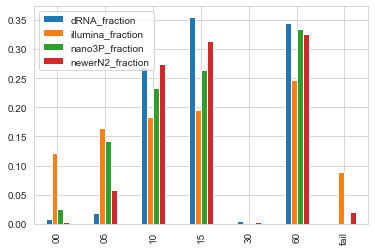

In [20]:
merge_df[sorted([col for col in merge_df.columns if "fraction" in col], reverse=False)].plot.bar()

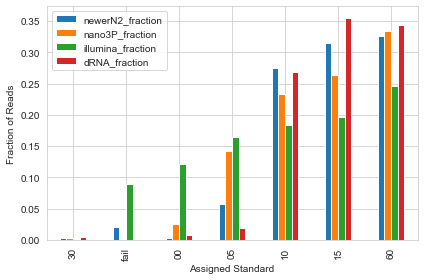

In [21]:
fig = merge_df[sorted([col for col in merge_df.columns if "fraction" in col], reverse=True)].sort_values("illumina_fraction").plot.bar()
fig.set_ylabel("Fraction of Reads")
fig.set_xlabel("Assigned Standard")
plt.tight_layout()
plt.savefig(f"./{npc.get_dt()}_ComparingStandardReads.png", dpi=300)

In [22]:
mini_df = merge_df[sorted([col for col in merge_df.columns if "fraction" in col], reverse=True)]

In [23]:
for col in mini_df.columns:
    mini_df[col] = mini_df[col]
    mini_df[f'{col}/illumina_fraction'] = mini_df[col] / mini_df['illumina_fraction']
    mini_df[f'log2_{col}/illumina_fraction'] = np.log2(mini_df[f'{col}/illumina_fraction'])

/tmp/ipykernel_2045401/3795728929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_df[col] = mini_df[col]
/tmp/ipykernel_2045401/3795728929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_df[f'{col}/illumina_fraction'] = mini_df[col] / mini_df['illumina_fraction']
/tmp/ipykernel_2045401/3795728929.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [24]:
mini_df

,newerN2_fraction,nano3P_fraction,illumina_fraction,dRNA_fraction,newerN2_fraction/illumina_fraction,log2_newerN2_fraction/illumina_fraction,nano3P_fraction/illumina_fraction,log2_nano3P_fraction/illumina_fraction,illumina_fraction/illumina_fraction,log2_illumina_fraction/illumina_fraction,dRNA_fraction/illumina_fraction,log2_dRNA_fraction/illumina_fraction
00,0.003364,0.024780,0.120859,0.008347,0.027834,-5.167023,0.205035,-2.286061,1.0,0.0,0.069062,-3.855971
05,0.057947,0.141404,0.163978,0.018435,0.353385,-1.500687,0.862341,-0.213670,1.0,0.0,0.112425,-3.152966
10,0.274102,0.233957,0.184151,0.268633,1.488466,0.573826,1.270463,0.345355,1.0,0.0,1.458766,0.544749
15,0.314695,0.263692,0.196050,0.355674,1.605176,0.682731,1.345026,0.427634,1.0,0.0,1.814202,0.859335
30,0.002662,0.002159,0.000000,0.004818,inf,inf,inf,inf,NaN,NaN,inf,inf
60,0.326610,0.334007,0.246329,0.344093,1.325909,0.406982,1.355937,0.439290,1.0,0.0,1.396883,0.482211
fail,0.020620,0.000000,0.088634,0.000000,0.232643,-2.103813,0.000000,-inf,1.0,0.0,0.000000,-inf


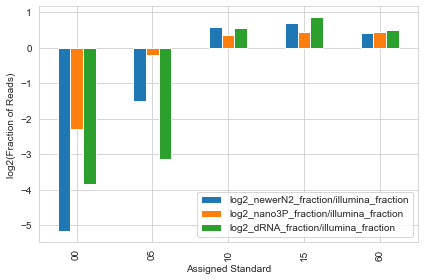

In [27]:
mini_df = mini_df[mini_df.index != "30"]
mini_df = mini_df[mini_df.index != "fail"]
fig = mini_df[sorted([col for col in mini_df.columns if "log2" in col and col != "log2_illumina_fraction/illumina_fraction"], reverse=True)].plot.bar()
fig.set_ylabel("log2(Fraction of Reads)")
fig.set_xlabel("Assigned Standard")
plt.tight_layout()
plt.savefig(f"./{npc.get_dt()}_ComparingStandardReads_log2FC.png", dpi=300)
plt.show()